In [1]:
# basic data utils
import numpy as np
import pandas as pd

# plotting
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
pal = sns.color_palette("hls", 10)

# Dimension reduction and clustering tools
import sklearn.cluster as cluster
from sklearn.decomposition import PCA, KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Data loading
from sklearn.datasets import fetch_openml

# Model selection
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Metrics for how good a clustering does
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, classification_report

In [2]:
test = pd.read_csv("data/sign_mnist_test.csv")
train = pd.read_csv('data/sign_mnist_train.csv')

In [3]:
print(f'Shape of train data: {train.shape}')
print(f'Shape of test data: {test.shape}')

Shape of train data: (27455, 785)
Shape of test data: (7172, 785)


In [4]:
label_test = test['label']
label_train = train['label']
train_data = train.drop('label',axis=1)
test_data = test.drop('label',axis=1)

In [5]:
# Display descriptive statistics for train dataset
print(f'Train descriptive stats {train.label.describe()}')
# Display descriptive statistics for test dataset
print(f'\nTest descriptive stats {test.label.describe()}')

Train descriptive stats count    27455.000000
mean        12.318813
std          7.287552
min          0.000000
25%          6.000000
50%         13.000000
75%         19.000000
max         24.000000
Name: label, dtype: float64

Test descriptive stats count    7172.000000
mean       11.247351
std         7.446712
min         0.000000
25%         4.000000
50%        11.000000
75%        18.000000
max        24.000000
Name: label, dtype: float64


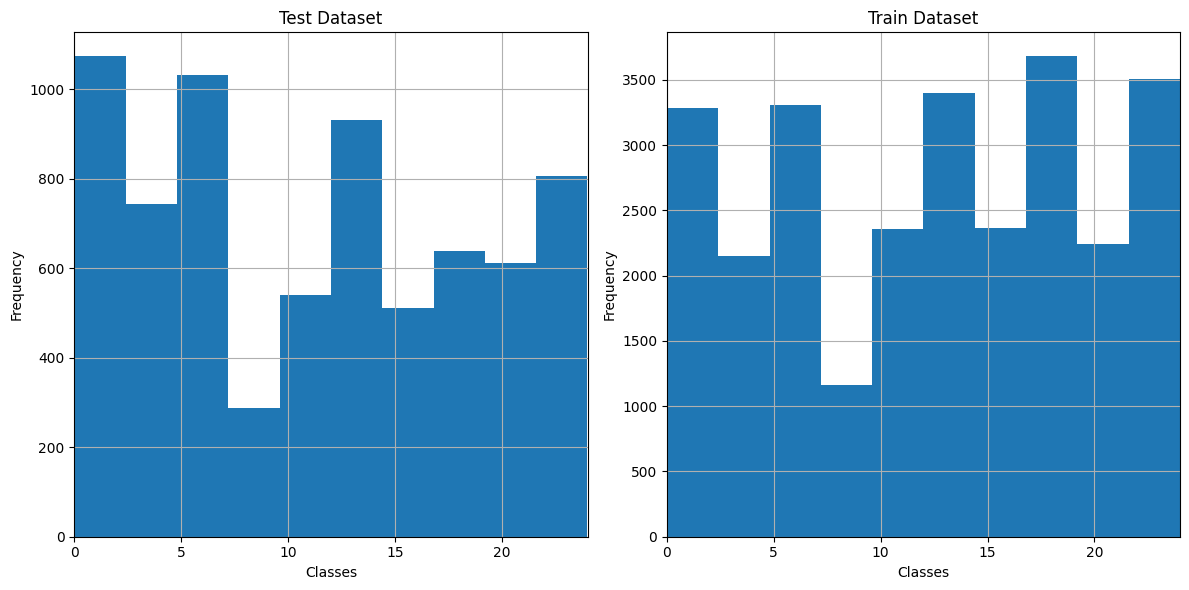

In [6]:
# Create a figure and axes for subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram and display descriptive statistics for test dataset
test.label.hist(ax=axes[0])
axes[0].set_title('Test Dataset')
axes[0].set_xlabel('Classes')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(0,24)
axes[0].grid(True)

# Plot histogram and display descriptive statistics for train dataset
train.label.hist(ax=axes[1])
axes[1].set_title('Train Dataset')
axes[1].set_xlabel('Classes')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim(0,24)
axes[1].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


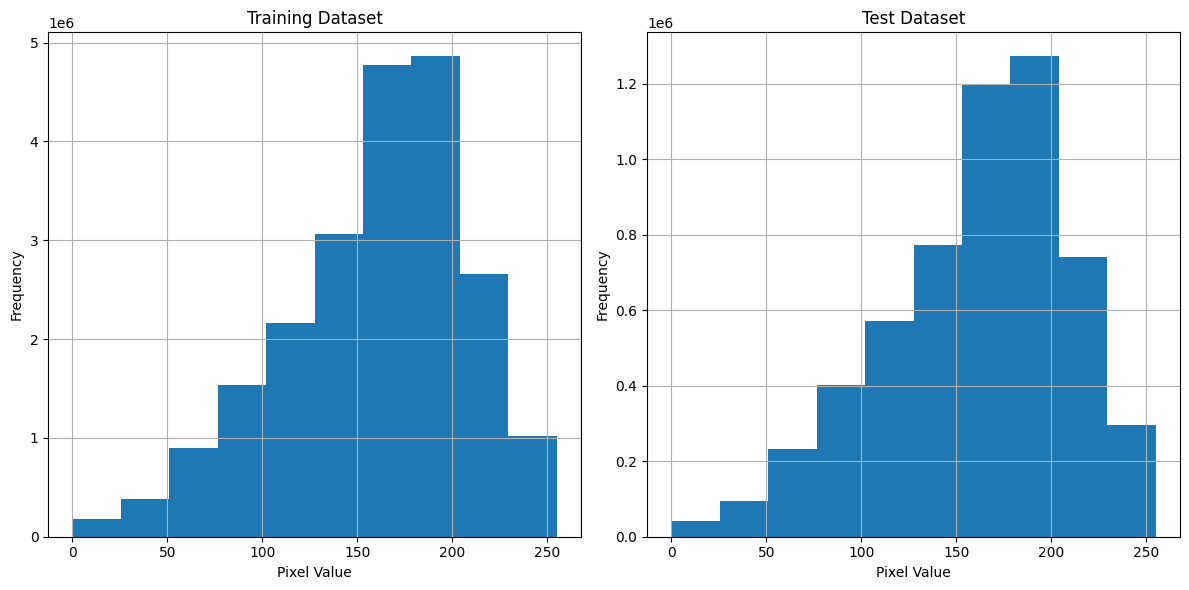

In [7]:
# Concatenate pixel values from both train and test datasets
pix_train = pd.Series(train_data.values.reshape(-1))
pix_test = pd.Series(test_data.values.reshape(-1))

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram and display descriptive statistics for training dataset
pix_train.hist(ax=axes[0])
axes[0].set_title('Training Dataset')
axes[0].set_xlabel('Pixel Value')
axes[0].set_ylabel('Frequency')

# Plot histogram for test dataset
pix_test.hist(ax=axes[1])
axes[1].set_title('Test Dataset')
axes[1].set_xlabel('Pixel Value')
axes[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [8]:
# Display descriptive statistics for train dataset
print(f'Train pixel descriptive stats {pix_train.describe()}')
# Display descriptive statistics for test dataset
print(f'\nTest pixel descriptive stats {pix_test.describe()}')

Train pixel descriptive stats count    2.152472e+07
mean     1.592910e+02
std      4.876951e+01
min      0.000000e+00
25%      1.300000e+02
50%      1.670000e+02
75%      1.940000e+02
max      2.550000e+02
dtype: float64

Test pixel descriptive stats count    5.622848e+06
mean     1.605711e+02
std      4.904256e+01
min      0.000000e+00
25%      1.300000e+02
50%      1.690000e+02
75%      1.960000e+02
max      2.550000e+02
dtype: float64


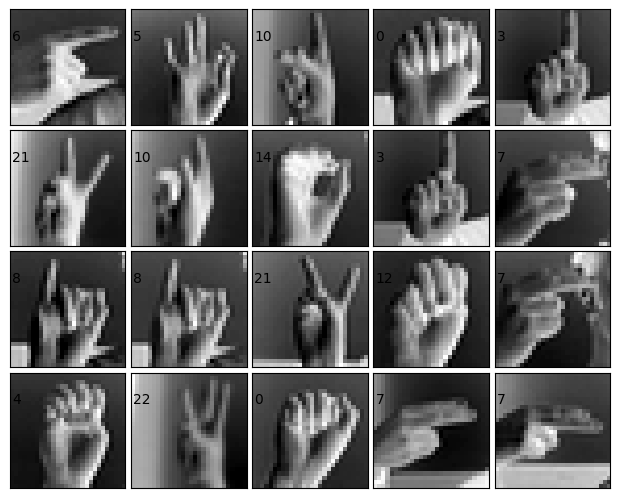

In [9]:
# examples of the raw data

fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(20):
    ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    # data is 28 x 28 pixels, grayscale
    ax.imshow(test_data.loc[i].to_numpy().reshape(28,28), cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(test.label.loc[i]))

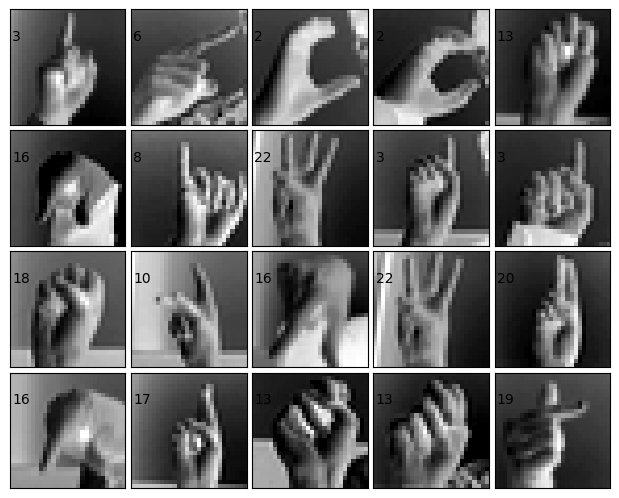

In [10]:
# examples of the raw data

fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(20):
    ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    # data is 28 x 28 pixels, grayscale
    ax.imshow(train_data.loc[i].to_numpy().reshape(28,28), cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(train.label.loc[i]))

### Tasks
Lets use some or all of those datasets to explore the following

1. PCA / kPCA / LDA dimensionality reduction to 2 dim for visualization
    - View the PC loadings to analyze what the components are
2. Classification via LDA (which uses all the components in sklearn)
    - cross validation performance
3. Model selection for number of PCs to capture most of the variability
    - in sample: pick the elbow of % variance explained or pick a fixed threshold of % variance explained
4. Clustering on top of the selected number of PCs
    - in sample: as above + BIC (or similar) of clustering model on top
    - grid search cros validation of pipeline params of preproc + dr + clustering
5. Using dimensionality reduction as a novelty/outlier detector
    - train on training set, visualize on test

In [13]:
pca = PCA(n_components=2)
kpca = KernelPCA(n_components=2, kernel='linear', gamma=1e-10, degree=3, eigen_solver='randomized')
lda = LinearDiscriminantAnalysis(n_components=2)
scaler = StandardScaler() # other choices are available!!

dataset = train_data
target = train.label
scaled = scaler.fit_transform(dataset)
preproc = pd.DataFrame(scaled, columns=scaler.get_feature_names_out())

preproc

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,-0.928951,-0.763625,-0.620852,-0.506458,-0.463774,-0.426610,-0.413304,-0.366583,-0.335512,-0.304798,...,1.033649,0.908302,0.833111,0.751478,0.690817,0.681926,0.678557,0.664063,0.658113,0.654939
1,0.231652,0.212805,0.121680,0.063570,-0.005683,-0.039066,-0.127718,-0.128922,-0.182377,-0.272827,...,-1.131056,0.022964,-0.393098,-1.132135,-1.066399,0.004150,0.190430,-0.931575,-0.410913,-0.168097
2,1.005388,0.988941,0.941025,0.866793,0.829661,0.763704,0.757597,0.762307,0.705804,0.654322,...,0.955217,0.816715,0.724459,0.625904,0.565302,0.571590,0.552589,0.521877,0.516625,0.546237
3,1.585689,1.564785,1.555534,1.514553,1.476378,1.428065,1.443003,1.415875,1.410223,1.453589,...,1.472864,1.320442,1.236673,1.128201,1.067364,0.997170,0.977732,0.948434,1.066859,0.049309
4,0.449265,0.463171,0.480144,0.478137,0.533248,0.569932,0.557687,0.643477,0.644550,0.654322,...,-0.770272,-0.648672,-0.750095,-0.802503,-0.454511,0.004150,-0.092998,0.016328,0.044995,0.297773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,1.053746,1.013978,0.992234,0.944524,0.964393,0.957476,0.928949,0.910845,0.889565,0.910087,...,-0.142821,0.267195,-0.843225,-1.289103,-1.725356,0.587352,1.119446,0.600869,0.956812,1.012106
27451,0.134935,0.137695,0.147285,0.115391,0.102103,0.071661,0.072192,0.049324,0.062638,0.046879,...,0.892472,0.770922,0.693416,0.610207,0.565302,0.524303,0.505351,0.521877,0.532346,0.530708
27452,0.691058,0.638428,0.582562,0.529958,0.479355,0.459205,0.414895,0.346400,0.277027,0.238703,...,-0.315370,0.740393,0.864154,0.767175,0.690817,0.650401,0.631319,0.632466,0.610950,0.623881
27453,0.763595,0.813685,0.838607,0.814972,0.829661,0.846749,0.843273,0.851430,0.828311,0.782205,...,-0.346743,-1.396630,-1.960782,-1.587342,-0.940884,-1.319876,-1.825062,-1.547713,-1.165521,-1.037721


In [14]:
# sklearn pca DOES automatically 0-center inputs but does NOT scale
# note that particularly for kernelPCA we need to sample a subset of the dataset
# because kernelPCA builds a NxN matrix which is very computationally expensive

red = pca.fit_transform(dataset) 
# or try any of the following
# red = pca.fit_transform(preproc)
# red = kpca.fit_transform(dataset.sample(5000)) # adjust subsampling according to dataset!
# red = kpca.fit_transform(preproc.sample(5000)) # adjust subsampling according to dataset!
# red = lda.fit_transform(dataset, target)
# red = lda.fit_transform(preproc, target)


reduced = pd.DataFrame(red, columns=['pc1','pc2']).join(target)
reduced

,pc1,pc2,label
0,120.129147,-440.121505,3
1,330.220419,46.448632,6
2,-55.598157,-676.402193,2
3,-288.261152,-442.893840,2
4,-242.989740,-63.177868,13
...,...,...,...
27450,-76.671249,440.948722,13
27451,26.320810,-307.689065,23
27452,-178.732334,-245.577144,18
27453,-735.097740,981.120956,17


C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_3588\3966142571.py:1: UserWarning: 
The palette list has fewer values (10) than needed (24) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=reduced, x='pc1', y='pc2', hue='label', palette=pal);


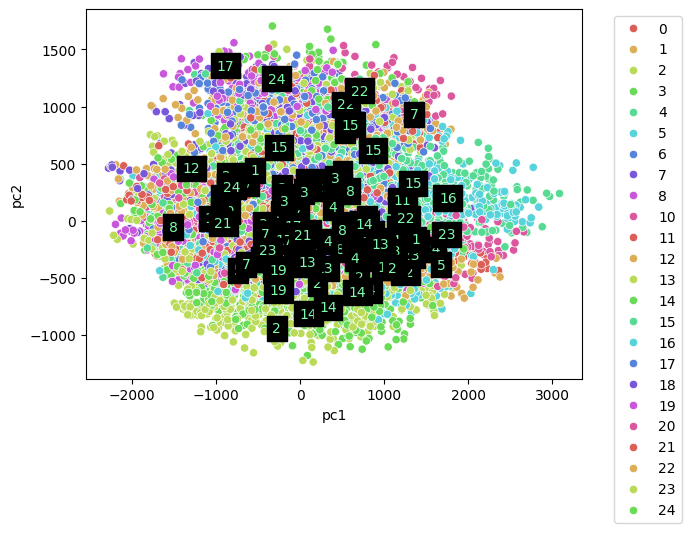

In [16]:
sns.scatterplot(data=reduced, x='pc1', y='pc2', hue='label', palette=pal);
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left');

labelit=True
if labelit:
    np.random.seed(777)
    rsamp = reduced.sample(100)
    for i in range(rsamp.shape[0]):
        # label the image with the target value
        plt.text(rsamp.iloc[i, 0], rsamp.iloc[i, 1], str(rsamp.iloc[i,2]), color='xkcd:seafoam', backgroundcolor='k')

In [17]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1 Loadings', 'PC2 Loadings'])
loadings

,PC1 Loadings,PC2 Loadings
0,-0.042989,-0.003703
1,-0.042727,-0.002527
2,-0.042868,0.000072
3,-0.043037,0.002095
4,-0.041860,0.003537
...,...,...
779,-0.036413,-0.105808
780,-0.035508,-0.102301
781,-0.033812,-0.099821
782,-0.031807,-0.096926


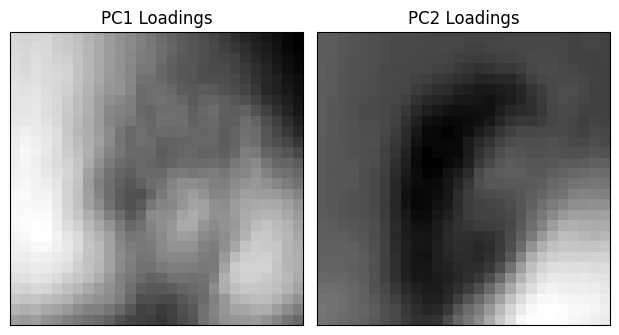

In [18]:
fig = plt.figure(figsize=(6, 3))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

ax = fig.add_subplot(1, 2, 1, xticks=[], yticks=[])
ax.imshow(loadings.loc[:,'PC1 Loadings'].to_numpy().reshape(28,28), cmap=plt.cm.binary, interpolation='nearest')
ax.set_title('PC1 Loadings')

ax = fig.add_subplot(1, 2, 2, xticks=[], yticks=[])
ax.imshow(loadings.loc[:,'PC2 Loadings'].to_numpy().reshape(28,28), cmap=plt.cm.binary, interpolation='nearest')
ax.set_title('PC2 Loadings');

# Task 2: LDA classification

In [49]:
# Split train_data into features and labels
X_train, y_train = train_data, train.label

# Split test_data into features and labels
X_test, y_test = test_data, test.label

lda.fit(X_train, y_train)
prediction = lda.predict(X_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.58      0.82      0.68       331
           1       0.68      0.63      0.65       432
           2       0.95      0.79      0.86       310
           3       0.41      0.62      0.49       245
           4       0.71      0.61      0.66       498
           5       0.48      0.42      0.45       247
           6       0.62      0.50      0.55       348
           7       0.76      0.54      0.63       436
           8       0.23      0.13      0.17       288
          10       0.37      0.39      0.38       331
          11       0.49      0.44      0.46       209
          12       0.31      0.26      0.28       394
          13       0.28      0.24      0.26       291
          14       0.56      0.42      0.48       246
          15       0.45      0.21      0.28       347
          16       0.29      0.49      0.37       164
          17       0.06      0.16      0.08       144
          18       0.24    

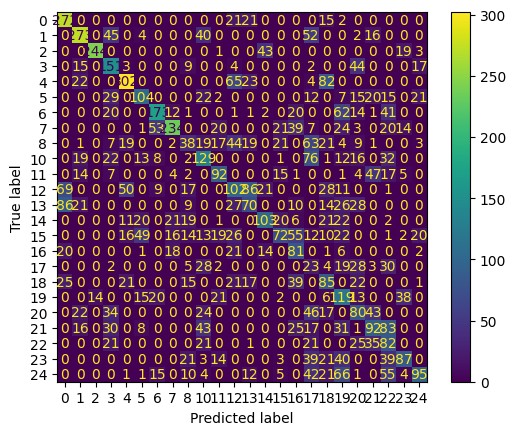

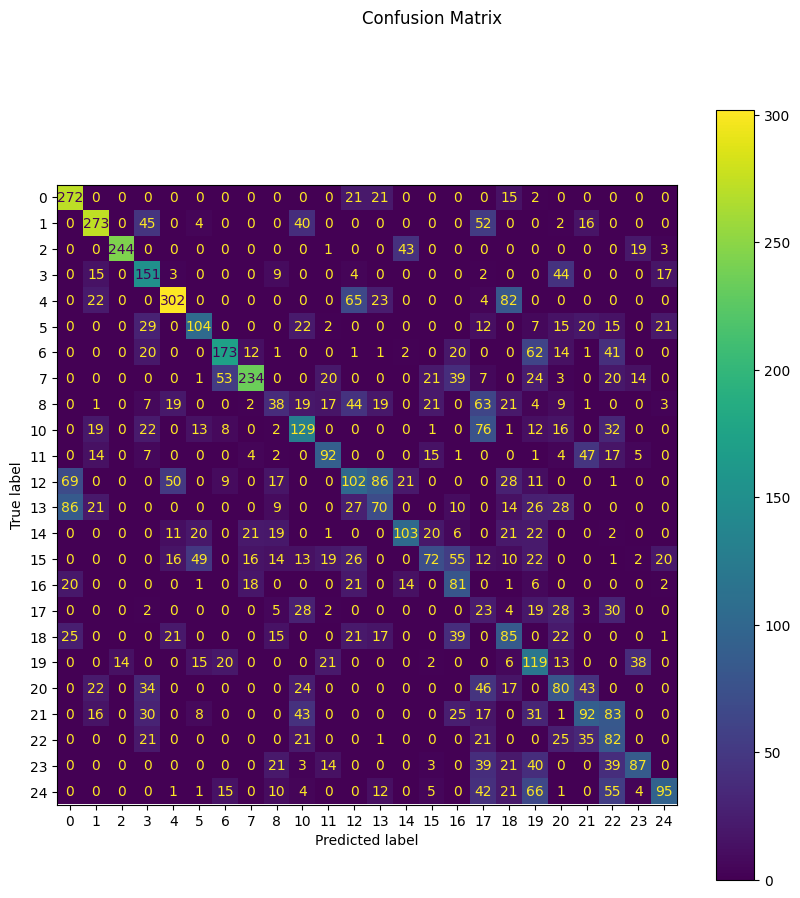

In [61]:
from sklearn.metrics import ConfusionMatrixDisplay 

# Create the confusion matrix display
disp = ConfusionMatrixDisplay.from_predictions(y_test, prediction)

# Set the figure size
plt.figure(figsize=(10, 10))

# Update the figure size of the existing display
disp.plot(ax=plt.gca())  # Set the current axis to the current figure

# Set the title
disp.figure_.suptitle("Confusion Matrix")

# Show the plot
plt.show()

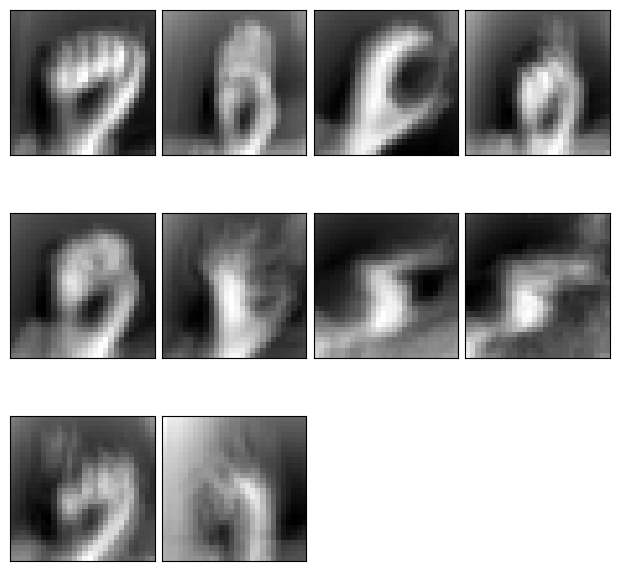

In [62]:
# LDA class means

fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(10):
    ax = fig.add_subplot(3, 4, i + 1, xticks=[], yticks=[])
    # data is 28 x 28 pixels, grayscale
    ax.imshow(lda.means_[i,:].reshape(28,28), cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value

# Task 3: Select PCs in sample via elbow methods

In [23]:
pca = PCA()
dataset = train_data
red = pca.fit_transform(dataset)

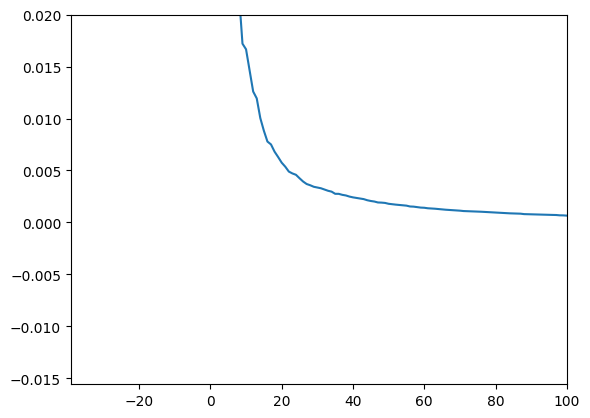

In [25]:
# pca.explained_variance_ is actually the eigenvalues
# pca.explained_variance_ratio_ is actually the % variance explained per eigenvalue
# zoom in on the elbow!!!
plt.plot(pca.explained_variance_ratio_);
plt.xlim(right=100);
plt.ylim(top=0.02);

take up to PC 57 to get to 0.9% variance explained


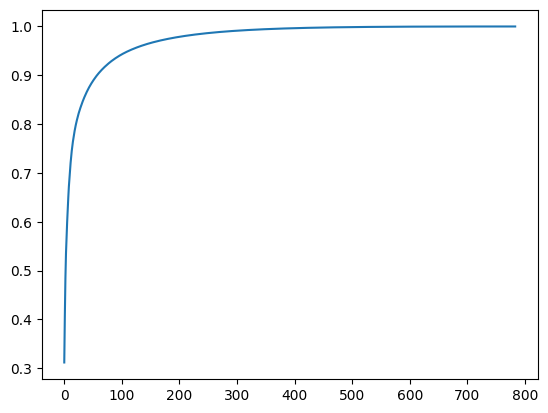

In [26]:
var_exp_thresh = 0.9
total_var_exp = np.cumsum(pca.explained_variance_ratio_)
plt.plot(total_var_exp);
pcindex = np.where(total_var_exp>=var_exp_thresh)[0]
print(f'take up to PC {pcindex[0]} to get to {var_exp_thresh}% variance explained')

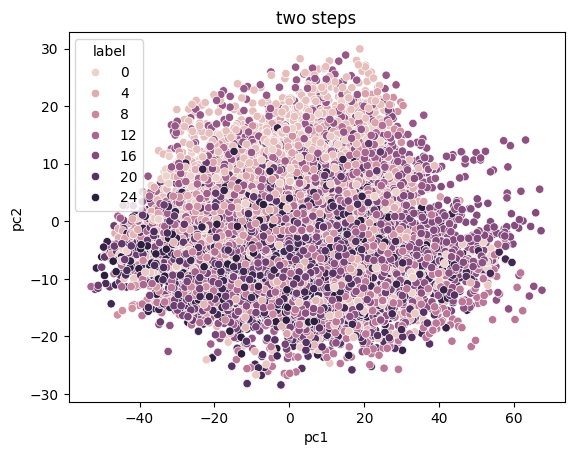

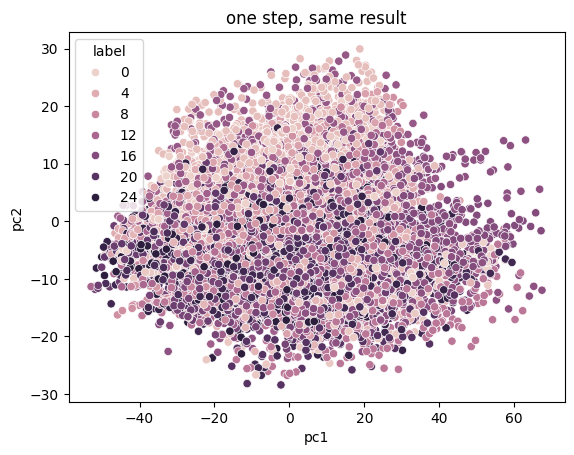

In [29]:
from sklearn.cluster import DBSCAN
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score, make_scorer

clust = DBSCAN();
scale = StandardScaler();
pca = PCA(n_components=2);

# lets see how a pipeline allows us to stack operations!
pipe_pca = Pipeline([('scaler',scale), ('pca',pca)])

# a two step version
pcs = pd.DataFrame( PCA(n_components=2).fit_transform( scale.fit_transform(train_data) ), columns=['pc1', 'pc2'])
pcs['label'] = train['label']
sns.scatterplot(data=pcs, x='pc1', y='pc2', hue='label');
plt.title('two steps')
plt.show();

# a one step version of the same
pcs = pd.DataFrame( pipe_pca.fit_transform(train_data), columns=['pc1', 'pc2'])
pcs['label'] = train['label']
sns.scatterplot(data=pcs, x='pc1', y='pc2', hue='label');
plt.title('one step, same result');

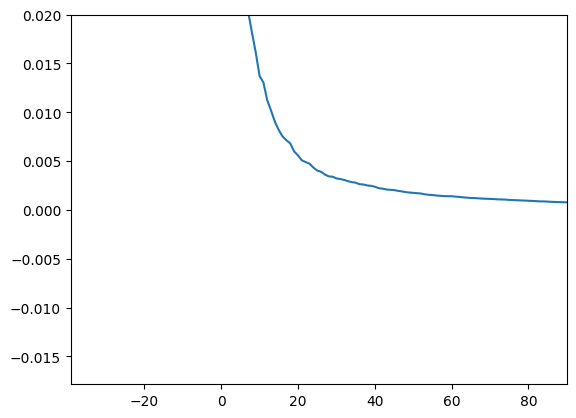

In [36]:
pca = PCA()
dataset = train_data.join(train.label)
dataset = dataset.dropna()
data = dataset.drop(columns=["label"])
data = StandardScaler().fit_transform(data)
target = dataset['label']

red = pca.fit_transform( data )
plt.plot(pca.explained_variance_ratio_); 
plt.xlim(right=90);
plt.ylim(top=0.02);